In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import pandas as pd
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [3]:
features=data_train.columns[data_train.columns!='label']
X_train, X_test,y_train, y_test = train_test_split((data_train[features]/ 255.0),data_train[['label']],random_state=104,test_size=0.2)
X_train.shape

(33600, 784)

In [4]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same',
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [5]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.values.reshape(-1,28,28,1), y_train, validation_split=0.2, verbose=True, epochs=10)

Epoch 1/10
840/840 [==============================] - 141s 167ms/step - loss: 1.0018 - accuracy: 0.6587 - val_loss: 0.1680 - val_accuracy: 0.9580
Epoch 2/10
840/840 [==============================] - 141s 168ms/step - loss: 0.3604 - accuracy: 0.8901 - val_loss: 0.0993 - val_accuracy: 0.9737
Epoch 3/10
840/840 [==============================] - 136s 162ms/step - loss: 0.2382 - accuracy: 0.9322 - val_loss: 0.0723 - val_accuracy: 0.9805
Epoch 4/10
840/840 [==============================] - 145s 172ms/step - loss: 0.1825 - accuracy: 0.9478 - val_loss: 0.0798 - val_accuracy: 0.9799
Epoch 5/10
840/840 [==============================] - 139s 165ms/step - loss: 0.1486 - accuracy: 0.9602 - val_loss: 0.0631 - val_accuracy: 0.9839
Epoch 6/10
840/840 [==============================] - 138s 164ms/step - loss: 0.1259 - accuracy: 0.9658 - val_loss: 0.0586 - val_accuracy: 0.9856
Epoch 7/10
840/840 [==============================] - 143s 171ms/step - loss: 0.1048 - accuracy: 0.9724 - val_loss: 0.0525 -

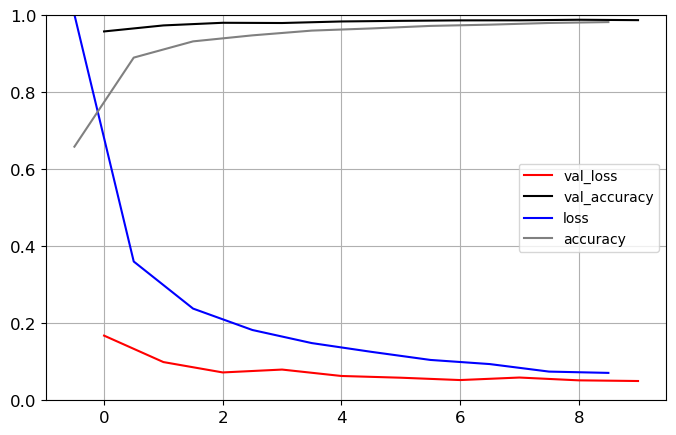

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

colors=[#"blue", "gray", #  loss      accuracy
        "red", "black"] #   val_loss  val_accuracy
                               #df[ ["val_loss","val_accuracy"] ].plot(figsize=(8,5), color=colors)
pd.DataFrame( history.history )[["val_loss","val_accuracy"]].plot(figsize=(8,5), color=colors)

# the validation error is computed at the end of each epoch, while the training error is
# computed using a running mean during each epoch. So the training curve should be shifted by
# half an epoch to the left.
#shift(-0.5)
         #1D array                #list
plt.plot(np.arange(-0.5,9,1), history.history["loss"], c="blue", label="loss")    #must be put after previous code for plotting Dataframe
plt.plot(np.arange(-0.5,9,1), history.history["accuracy"], c="gray", label="accuracy")#must be put after previous code for plotting Dataframe
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [7]:
score = model.evaluate(X_test.values.reshape(-1,28,28,1), y_test)
score

263/263 [==============================] - 10s 36ms/step - loss: 0.0446 - accuracy: 0.9889


[0.04455426335334778, 0.9889285564422607]

In [8]:
y_pred = np.argmax(model.predict((data_test[features]/ 255.0).values.reshape(-1,28,28,1)),axis=1)
id_values=pd.read_csv('sample_submission.csv')['ImageId']

875/875 [==============================] - 28s 32ms/step


In [9]:
pd.DataFrame({'ImageId':np.array(id_values.values),'Label':np.array(y_pred)}).to_csv('submission.csv',index=False)